In [1]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

In [2]:
#Read the dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

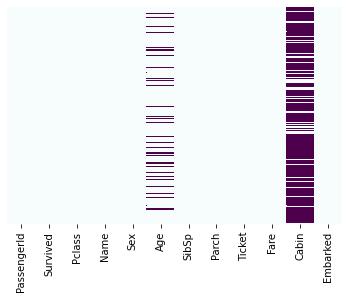

In [8]:
#Missing Data
sns.heatmap(train.isnull(),yticklabels = False,cbar=False,cmap='BuPu')


<AxesSubplot:>

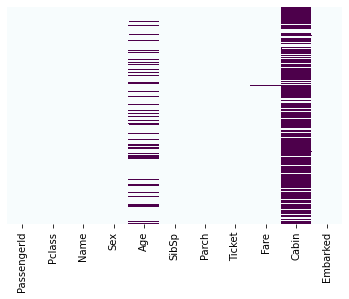

In [9]:
sns.heatmap(test.isnull(),yticklabels = False,cbar=False,cmap='BuPu')

In [10]:
#missing data in percent by features (train)
train.isna().sum()/len(train)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [12]:
#missing data in percent by features (test)
test.isna().sum()/len(test)*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [13]:
#Missing values:

#'Cabin' - 77% of missing values. As long as there is 3/4 of the data missing, not trustable
#drop the feature

#'Age' - 20% of missing values, we can try and imputate

#'Embarked' - 0.2% of missing values, insignificant hence we just drop the cases where missing

In [14]:
#check for unique values for duplications

train.nunique().sort_values()

Survived         2
Sex              2
Pclass           3
Embarked         3
SibSp            7
Parch            7
Age             88
Cabin          147
Fare           248
Ticket         681
PassengerId    891
Name           891
dtype: int64

In [15]:
#Categorical values:

#'Sex' - 2 possible values, one hot encoding and drop first 

# 'Name' - doesn't give useful info, drop

#'Ticket' - doesn't give useful info, drop

#'Cabin' - as mentioned, drop

#'Embarked' - 3 possible values, one hot encoding

In [16]:
def cleanData(data):
    
    # Data missing and categorical to drop
    data.drop(['Cabin','Name','Ticket'], axis=1, inplace=True)

    # Data missing Case2
    data['Age'] = data.groupby(['Pclass','Sex'])['Age'].transform(lambda x: x.fillna(x.median()))
    
    # FARE Data missing in test
    data['Fare'] = data.groupby(['Pclass','Sex'])['Fare'].transform(lambda x: x.fillna(x.median()))
    
    
    # Data missing Case3
    data.dropna(axis=0, subset=['Embarked'], inplace=True)
    
    # Categorical Data
    le = preprocessing.LabelEncoder()
    
    # Sex
    data['Sex'].replace({'male':0, 'female':1}, inplace=True)
    
    # Embarked
    data['Embarked'].replace({'S':0, 'C':1, 'Q':2}, inplace=True)
    
    return data

In [17]:
clean_train = cleanData(train)
clean_test = cleanData(test)

In [18]:
#check if the data is cleaned
clean_train.info()
clean_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    int64  
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 69.5 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-n

<AxesSubplot:xlabel='Survived', ylabel='count'>

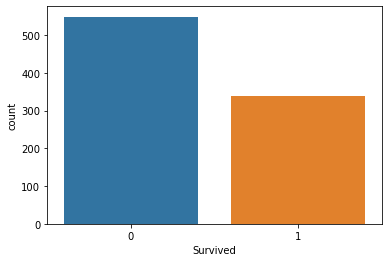

In [20]:
sns.countplot(x='Survived',data=train)

In [21]:
#Imbalanced data, which is reasonable.

<AxesSubplot:xlabel='Survived', ylabel='count'>

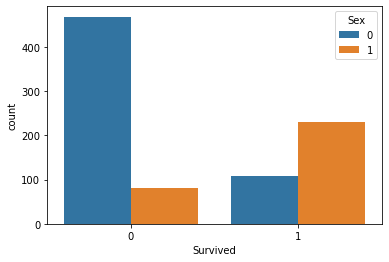

In [22]:
sns.countplot(x='Survived',hue='Sex',data=train)

In [23]:
#Majority of the male passengers did not survive.

<AxesSubplot:xlabel='Survived', ylabel='count'>

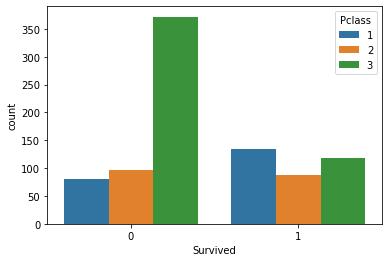

In [24]:
sns.countplot(x='Survived',hue='Pclass',data=train)

In [25]:
#Based on the class, we see that class 1 seems to have higher survival rate than the other 2. class 3 is worst.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

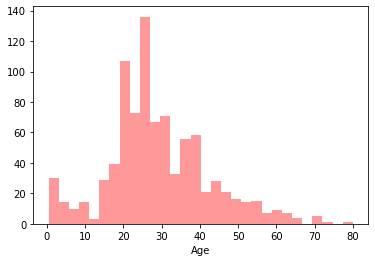

In [26]:
sns.distplot(train['Age'],bins=30,color='red',kde=False)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

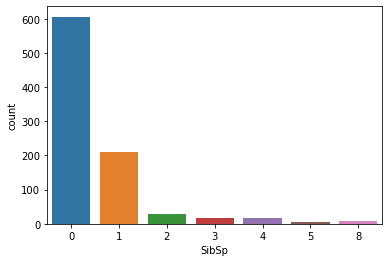

In [27]:
sns.countplot(x='SibSp',data=train)

In [28]:
#Majority of the passengers are single?

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare'>

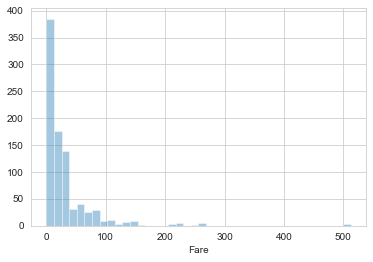

In [29]:
sns.set_style('whitegrid')
sns.distplot(train['Fare'],bins=40,kde=False)

In [30]:
#The price shows a positively skewed distribution, which is logical. More expensive tickets may be for upper class

<AxesSubplot:>

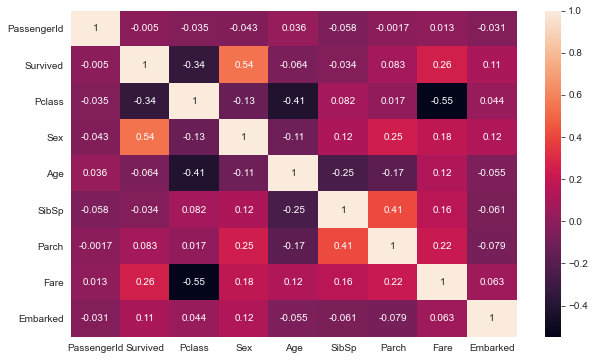

In [31]:
plt.figure(figsize=(10,6))
sns.heatmap(train.corr(),annot=True)

In [32]:
#Modelling

# Set X and y
y = train['Survived']
X = pd.get_dummies(train.drop('Survived', axis=1))

# Split model train test data
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=42)

In [33]:
def fitAndPredict(model):
    """The following code makes faster to evaluate a model 
    automating the fit and accuracy process"""
    
    model.fit(X_train, y_train)
    prediction = model.predict(X_val)
    return accuracy_score(y_val, prediction)

In [34]:
#Lets make some models
model1 = LogisticRegression(solver='liblinear', random_state=42)
model2 = GradientBoostingClassifier()
model3 = RandomForestClassifier()
model4 = SGDClassifier()
model5 = SVC()

models = [model1, model2, model3, model4, model5]
i = 0
for model in models:
    i +=1
    print("Model ", i,":", model)
    print("ACC: ", fitAndPredict(model))

Model  1 : LogisticRegression(random_state=42, solver='liblinear')
ACC:  0.797752808988764
Model  2 : GradientBoostingClassifier()
ACC:  0.8202247191011236
Model  3 : RandomForestClassifier()
ACC:  0.8033707865168539
Model  4 : SGDClassifier()
ACC:  0.6573033707865169
Model  5 : SVC()
ACC:  0.6348314606741573


In [35]:
#As long as GradientBoost is the best of the tried ones lets tune it a bit
model = GradientBoostingClassifier(min_samples_split=20, min_samples_leaf=60, max_depth=3, max_features=7)
fitAndPredict(model)

0.8370786516853933

In [36]:
#Deliver (After delivering tunned gradient it seems to have less punctuation than default 1)
predict = model2.predict(pd.get_dummies(clean_test))

output = pd.DataFrame({'PassengerId': clean_test.PassengerId, 'Survived': predict})
output.to_csv('GradientBoost_2ndsubmission.csv', index=False)
print("Submission saved")

Submission saved
